In [1]:
import pandas as pd

In [38]:
import numpy as np

In [2]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [3]:
 !pip install xgboost --user

In [4]:
 import xgboost as xgb

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
 file_path="C:/Users/Gaurav/OneDrive/Desktop/GDSC_DATASET.csv"

In [8]:
 df=pd.read_csv(file_path)

In [9]:
 df.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [10]:
 from sklearn.preprocessing import LabelEncoder

In [11]:
categorical_cols=df.select_dtypes(include=['object']).columns

In [12]:
 label_encoders={}
        
        
 for col in categorical_cols:
      le=LabelEncoder()
      df[col]=le.fit_transform(df[col].astype(str))
      label_encoders[col]=le

In [13]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [14]:
print(df.columns)

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')


In [15]:
# Selecting features (X) and target variable (y)
target = "LN_IC50"  # Dependent variable
features = ["DRUG_ID", "GDSC Tissue descriptor 1", "GDSC Tissue descriptor 2", 
            "Cancer Type (matching TCGA label)", "Microsatellite instability Status (MSI)"]

In [16]:
print(df.columns)

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium',
       'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')


In [17]:
X = df.drop(columns=["TARGET"])  # Features (remove the target column)
y = df["TARGET"]  # Target variable

In [18]:
df.columns = df.columns.str.strip()

In [19]:
if "Microsatellite instability Status (MSI)" in df.columns:
    print("Column exists!")
else:
    print("Column is missing! Check spelling.")

Column exists!


In [20]:
df["Microsatellite instability Status (MSI)"] = df["Microsatellite instability Status (MSI)"].fillna("Unknown")

In [21]:
print(features)

['DRUG_ID', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)']


In [22]:
if "Microsatellite instability Status (MSI)" in features:
    features.remove("Microsatellite instability Status (MSI)")

In [23]:
print([col for col in df.columns if "Microsatellite" in col])

['Microsatellite instability Status (MSI)']


In [24]:
df.columns = df.columns.str.strip()

In [25]:
print(features)

['DRUG_ID', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)']


In [26]:
for col in df.columns:
    if "Microsatellite" in col:
        print(col)

Microsatellite instability Status (MSI)


In [27]:
features = ['DRUG_ID', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 
            'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)']

In [28]:
features.remove("Microsatellite instability Status (MSI)")
print(features)

['DRUG_ID', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)']


In [29]:
df.columns = df.columns.str.strip()

In [30]:
print(df.columns.tolist())

['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME', 'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)', 'Microsatellite instability Status (MSI)', 'Screen Medium', 'Growth Properties', 'CNA', 'Gene Expression', 'Methylation', 'TARGET', 'TARGET_PATHWAY']


In [31]:
 df = df[features + [target]]

In [32]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train)


        DRUG_ID  GDSC Tissue descriptor 1  GDSC Tissue descriptor 2  \
84593      1494                        11                        39   
13370      1019                         6                         7   
82960      1463                         9                        32   
130118     1720                         5                        24   
144418     1803                         6                         7   
...         ...                       ...                       ...   
119879     1630                        14                        41   
103694     1585                        18                        52   
131932     1733                        13                        36   
146867     1808                         3                        26   
121958     1632                         8                        31   

        Cancer Type (matching TCGA label)  
84593                                  20  
13370                                  12  
82960          

In [34]:
xgb_regressor = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [35]:
print(y_train)

84593    -5.294142
13370     1.070032
82960     2.657331
130118    5.462135
144418    4.956850
            ...   
119879    4.124450
103694    4.473480
131932    1.665796
146867    3.108810
121958    2.735671
Name: LN_IC50, Length: 193628, dtype: float64


In [36]:
# Predictions
y_pred = xgb_regressor.predict(X_test)


In [39]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [40]:
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1.8072
R² Score: 0.5719


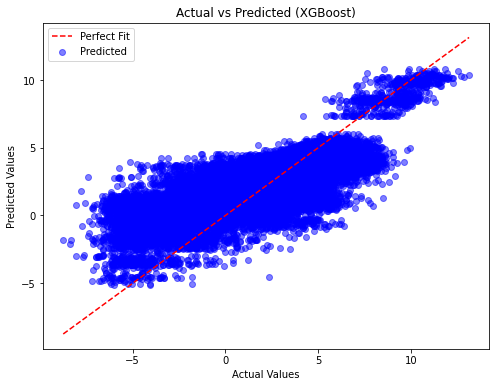

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (XGBoost)")
plt.legend()
plt.show()



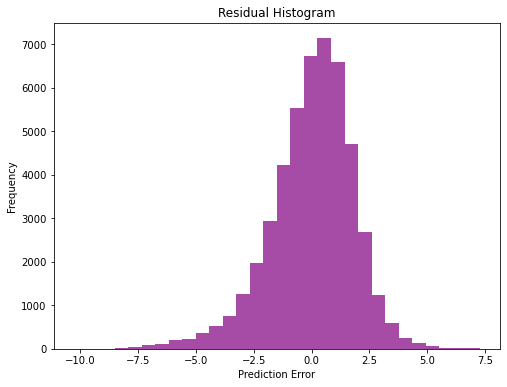

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color="purple", alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 3.2659
R-squared (R²): 0.5719
